In [15]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [16]:
(x_train,_),(_,_) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_train = x_train.reshape(-1,28*28)

In [17]:
def build_generator():
  model = tf.keras.Sequential([
      layers.Dense(128,activation = 'relu',input_shape = (100,)),
      layers.Dense(784,activation = 'sigmoid')
  ])
  return model

In [20]:
def build_discriminator():
  model = tf.keras.Sequential([
      layers.Dense(128,activation = 'relu',input_shape = (784,)),
      layers.Dense(1,activation = 'sigmoid')
  ])
  return model

In [21]:
generator = build_generator()
discriminator = build_discriminator()

In [22]:
discriminator.compile(optimizer= 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [24]:
discriminator.trainable = False
gan_in = layers.Input(shape =(100,))
gan_img = generator(gan_in)
gan_out = discriminator(gan_img)
gan = tf.keras.Model(gan_in,gan_out)
gan.compile(optimizer = 'adam',loss = 'binary_crossentropy')

In [49]:
def train_gan(epochs,batch_size):
  for epoch in range(epochs):
    noise = np.random.normal(0,1,(batch_size,100))
    gan_img = generator.predict(noise)

    real_img = x_train[np.random.randint(0,x_train.shape[0],batch_size)]

    label_real = np.ones((batch_size,1))
    label_fake = np.zeros((batch_size,1))

    d_loss_real = discriminator.train_on_batch(real_img,label_real)
    d_loss_fake = discriminator.train_on_batch(gan_img,label_fake)

    noise = np.random.normal(0,1,(batch_size,100))
    labels = np.ones((batch_size,1))
    g_loss = gan.train_on_batch(noise,labels)
    print(f"epoch {epoch +1}/{epochs}[D loss: {d_loss_real[0]:.4f},acc.:{d_loss_real[1]*100:.2f}%][G loss:{g_loss :.4f}]")

In [50]:
def plot_generated_image(generator,epochs,examples =10,dim=(1,10),figsize = (10,1)):
  noise = np.random.normal(0,1,(examples,100))
  generated_images = generator.predict(noise)
  generated_images = generated_images.reshape(examples,28,28)

  plt.figure(figsize=figsize)
  for i in range(examples):
    plt.subplot(dim[0],dim[1], i+1)
    plt.imshow(generated_images[i],cmap = 'gray')
    plt.axis('off')
plt.show()

In [51]:
train_gan(epochs =15,batch_size=32)

1/1 [==============================] - 0s 15ms/step
epoch 1/15[D loss: 0.0923,acc.:100.00%][G loss:3.7321]
1/1 [==============================] - 0s 14ms/step
epoch 2/15[D loss: 0.0534,acc.:100.00%][G loss:3.7782]
1/1 [==============================] - 0s 14ms/step
epoch 3/15[D loss: 0.0510,acc.:100.00%][G loss:3.5597]
1/1 [==============================] - 0s 14ms/step
epoch 4/15[D loss: 0.0702,acc.:100.00%][G loss:3.5943]
1/1 [==============================] - 0s 21ms/step
epoch 5/15[D loss: 0.0495,acc.:100.00%][G loss:3.5779]
1/1 [==============================] - 0s 15ms/step
epoch 6/15[D loss: 0.0371,acc.:100.00%][G loss:3.5235]
1/1 [==============================] - 0s 15ms/step
epoch 7/15[D loss: 0.0263,acc.:100.00%][G loss:3.5646]
1/1 [==============================] - 0s 14ms/step
epoch 8/15[D loss: 0.0322,acc.:100.00%][G loss:3.4675]
1/1 [==============================] - 0s 14ms/step
epoch 9/15[D loss: 0.0190,acc.:100.00%][G loss:3.3572]
1/1 [==============================] 

1/1 [==============================] - 0s 26ms/step


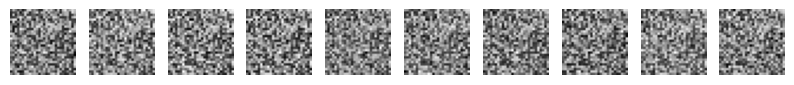

In [45]:
plot_generated_image(generator,epochs = 15)